# Covid-19 death statistic

In [8]:
# ========================== LIBRARIES ======================================
# Linear algebra
import numpy as np

# Data processing
import pandas as pd

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
# ========================== DATA READING ===================================

data1=pd.read_csv("Data/owid-covid-data.csv") # data covid all countries
# Extract Data Covid from Portugal
data1_pt=data1.loc[data1['iso_code'] == 'PRT'] # [2020/02/02 - 2020/12/19]

# Extract Data deaths in Portugal
data2=pd.read_csv("Data/Dados_SICO_2020-12-30-Nr_mortes.csv")

# Extract Data deaths by type in Portugal
data3_excel=pd.read_excel('Data/PORDATA_Obitos-por-algumas-causas-de-morte.xlsx')

In [10]:
# ========================== DATA ANALYSIS ==================================

# Create variable with number of deaths by year in Portugal
year=2015
num_years=2021-year
pt_deaths_total_year = np.zeros((2,num_years))
pt_deaths_total_year[0,:]=range(year,2021)
pt_deaths_total_year = pt_deaths_total_year.astype('int32')
i=0

while ( year != 2021):
    year_str = str(year) 
    temp = data2.loc[:,[year_str]]
    pt_deaths_total_year[1,i]=temp.sum(axis=0,skipna=True)
    year = year+1
    i=i+1

In [11]:
# Create variable with number of deaths by month from 2015-2020
pt_deaths_total_month = np.zeros((13,num_years))
pt_deaths_total_month[0,[0,1,2,3,4,5]] = range(2015,2021)

year=2015
days_per_month=[31,29,31,30,31,30,31,31,30,31,30,31]
j=0
i=1
n=0
sum_days = days_per_month[0]-1

for i in range(1,13):    # Cycle per each month
    for j in range(0,6):    # Cycle per each year
        year_str=str(year)
        temp = data2.loc[n:sum_days,year_str]
        pt_deaths_total_month[i,j] = temp.sum()
        year=year+1
    year=2015    
    n=n+days_per_month[i-1]
    if i != 12:
        sum_days = sum_days+days_per_month[i]

In [12]:
# Create variable with number of deaths by type from 2010-2018
data3 = data3_excel.drop(data3_excel.index[0:6])
# Clean and organize dataset as data3
data3.reset_index(drop=True,inplace=True)
data3 = data3.drop(data3.index[53:74])
data3.reset_index(drop=True,inplace=True)
data3=data3.iloc[0:53,0:11]
data3=data3.rename(columns=data3.iloc[0])
data3 = data3.drop(data3.index[0])
data3.reset_index(drop=True,inplace=True)

([<matplotlib.axis.YTick at 0x261c6a99e20>,
 <a list of 13 Text major ticklabel objects>)

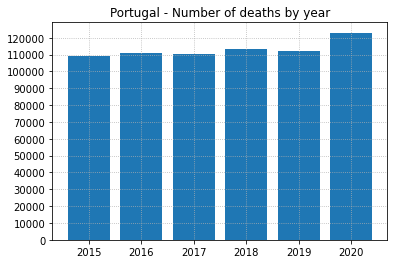

In [13]:
# ========================== DATA VISUALIZATION =============================

# PLOT 1: Number of deaths in Portugal by year
# Scripting layer ============================================================
plt.bar(pt_deaths_total_year[0,:],pt_deaths_total_year[1,:])
plt.title('Portugal - Number of deaths by year')
plt.grid(linestyle=':')
plt.yticks(np.arange(0,130000,10000))

In the graph above it's possible to verify the difference of number of deaths in 2015-2019 with 2020. Covid-19 had a big impact not only because of the virus but also due to the increase of death by other diseases. 

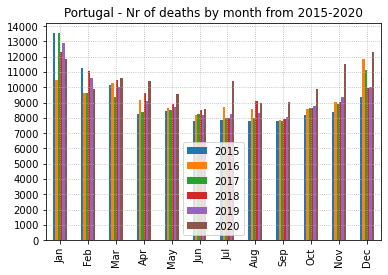

In [14]:
# PLOT 2.1: Number of deaths in Portugal by month during 2015-2020
rows2=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
columns2=['2015','2016','2017','2018','2019','2020']
df2=pd.DataFrame(data=pt_deaths_total_month[1:13,:],index=rows2,columns=columns2)
df2.plot.bar()
plt.title('Portugal - Nr of deaths by month from 2015-2020')
plt.yticks(np.arange(0, 15000, 1000))
plt.grid(linestyle=':')

In the graphic above it's possible to check the number of deaths by month from 2015-2020. The pandemic started to have impact in Portugal in the number of deaths in April, where it's already visible the brown line (2020) as dominant until the end of the year, with the exception of August.

Text(0.5, 1.0, 'Portugal - Nr of deaths by month from 2015-2020')

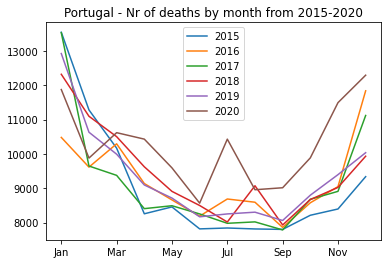

In [15]:
# PLOT 2.2
df2.plot()
plt.title('Portugal - Nr of deaths by month from 2015-2020')

Above there's another way to see the same data as the graphic before, statistic of the number of deaths by month from 2015-2020.

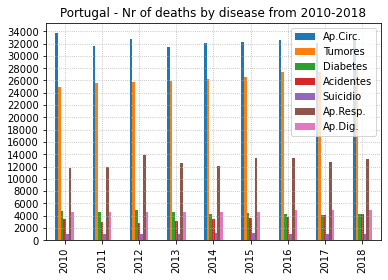

In [16]:
# PLOT 3: Number of deaths in Portugal by month during 2015-2020
rows3=['2010','2011','2012','2013','2014','2015','2016','2017','2018']
columns3=['a','b','c','d','e','f','g','h','i','j']
tmp3=data3.iloc[43:52,1:8]
tmp3.reset_index(drop=True,inplace=True)
tmp3.index = ['2010','2011','2012','2013','2014','2015','2016','2017','2018']
tmp3.columns = ['Ap.Circ.','Tumores','Diabetes','Acidentes','Suicidio','Ap.Resp.','Ap.Dig.']
tmp3.plot.bar()
plt.title('Portugal - Nr of deaths by disease from 2010-2018')
plt.yticks(np.arange(0, 35000, 2000))
plt.grid(linestyle=':')